# Домашнее задание 2.

Продолжаем знакомиться с библиотекой `tensorflow`.

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Задание 1 -- tensorflow vs numpy (3 балла).

Сравните скорость работы функций над массивами в фреймворках tensorflow и numpy. Для этого реализуйте на нампае и тф'е следующее:

 * Сумму квадратов диагональных элементов квадратной матрицы. Например для матрицы
$$
 \begin{pmatrix}
     1& 0& 5\\
     -2& 8& 12\\
     4& 1& -5
 \end{pmatrix}
$$
 такая сумма будет равна $1^2 + 8^2 + (-5)^2 = 90$.
 * Угол между векторами в n-мерном пространстве. Напомним, что он вычисляется по формуле
 $$
     \arccos \cfrac{\left\langle x, y\right\rangle}{||x||\cdot ||y||}
 $$

 * Сумму элементов коммутатора квадратных матриц $A$ и $B$. Коммутатор матриц это матрица $C = AB - BA$.
 
Постройте графики зависимости времени выполнения операций от размера массивов (в логарифмическй шкале) для каждой задачи для tensorflow и numpy (три рисунка, по два графика на рисунок). Элементы матриц выбирайте случайным образом (через модуль tf.random и np.random соотвтетственно). Какой фреймворк оказывается быстрее? Как Вы думаете, почему?

Можете пользоваться образцом кода ниже.

**Замечание**. Графики должны быть опрятными! Подписывайте оси и единицы измерения, указывайте легенду. За неопрятные графики оценка за задание может быть снижена.

**Подсказка**. Функция time.time() возвращает время в секундах (с высокой точностью), прошедшее от 00:00 1 января 1970 года. Используйте её, чтобы посчитать, сколько длилось выполнение куска кода. Также вам могут пригодиться функции `tf.linalg.norm`, `tf.diag_part`, `tf.acos`, `tf.matmul`

<Figure size 1296x1296 with 0 Axes>

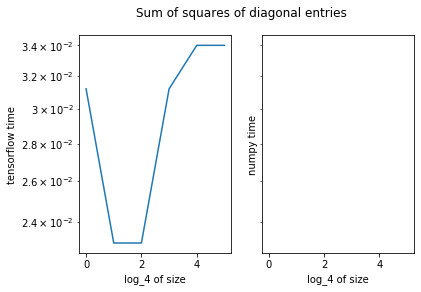

<Figure size 1296x1296 with 0 Axes>

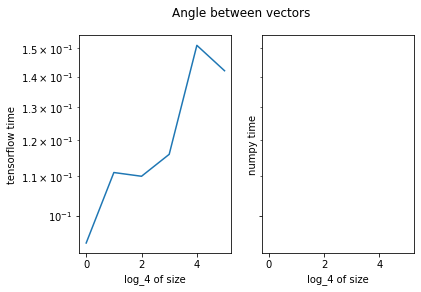

<Figure size 1296x1296 with 0 Axes>

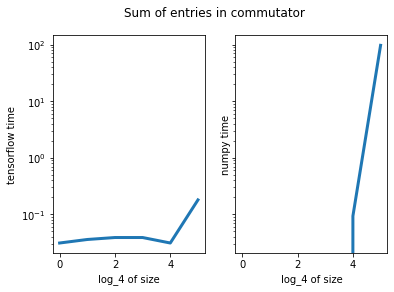

In [6]:
import time

tf_time_array_diag = []
tf_time_array_angle = []
tf_time_array_sum = []

for n in [4 ** k for k in range(6)]:
    tf.reset_default_graph()
    sess = tf.Session()
    x = tf.Variable(tf.random_uniform([n, n], minval=-10, maxval=10))
    # want sum of squares of diagonal entries in x
    
    u = tf.Variable(tf.random_uniform([n], minval=-10, maxval=10))
    v = tf.Variable(tf.random_uniform([n], minval=-10, maxval=10))
    # want angle between u and v
    
    
    a = tf.Variable(tf.random_uniform([n, n], minval=-10, maxval=10))
    b = tf.Variable(tf.random_uniform([n, n], minval=-10, maxval=10))
    #want sum of entries in ab - ba
    
    
    sess.run(tf.global_variables_initializer())
    
    begin = time.time()  
    sess.run(tf.reduce_sum(tf.square(tf.matrix_diag_part(x))))
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    tf_time_array_diag.append(time_spent)
    
    begin = time.time() 
    sess.run(tf.acos(tf.tensordot(u, v, 1) / tf.sqrt(tf.linalg.norm(u) * tf.linalg.norm(v))))
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    tf_time_array_angle.append(time_spent)
    
    begin = time.time() 
    sess.run(tf.reduce_sum(tf.matmul(a, b) - tf.matmul(b, a)))
    end = time.time()
    time_spent = end - begin
    # remember time_spent
    tf_time_array_sum.append(time_spent)
    
    sess.close()
    
    



#The same but for numpy

np_time_array_diag = []
np_time_array_angle = []
np_time_array_sum = []

for n in [4**k for k in range(6)]:
    x = np.random.randint(-10, 10, (n, n))
    
    begin  = time.time()
    y = np.sum(np.square(np.diag(x)))
    end = time.time()
    
    np_time_array_diag.append(end - begin)
    u = np.random.randint(-10, 10, (n))
    v = np.random.randint(-10, 10, (n))
    
    begin  = time.time()
    y = np.arccos(np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v)))
    end = time.time()
    
    np_time_array_angle.append(end - begin)
    a = np.random.randint(-10, 10, (n, n))
    b = np.random.randint(-10, 10, (n, n))
    
    begin  = time.time()
    y = np.sum(np.matmul(a, b) - np.matmul(b, a))
    end = time.time()
    
    np_time_array_sum.append(end - begin)



# plot results

plt.figure(figsize=(18,18))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Sum of squares of diagonal entries')
ax1.plot(range(6), tf_time_array_diag)
ax1.set_xlabel("log_4 of size")
ax1.set_ylabel("tensorflow time")
ax1.set_yscale('log')


ax2.plot(range(6), np_time_array_diag)
ax2.set_xlabel("log_4 of size")
ax2.set_ylabel("numpy time")
plt.show()

plt.figure(figsize=(18,18))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Angle between vectors')
ax1.plot(range(6), tf_time_array_angle)
ax1.set_xlabel("log_4 of size")
ax1.set_ylabel("tensorflow time")
ax1.set_yscale('log')


ax2.plot(range(6), np_time_array_angle)
ax2.set_xlabel("log_4 of size")
ax2.set_ylabel("numpy time")
plt.show()

plt.figure(figsize=(18,18))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
f.suptitle('Sum of entries in commutator')
ax1.plot(range(6), tf_time_array_sum, linewidth = 3)
ax1.set_xlabel("log_4 of size")
ax1.set_ylabel("tensorflow time")
ax1.set_yscale('log')

ax2.plot(range(6), np_time_array_sum, linewidth = 3)
ax2.set_xlabel("log_4 of size")
ax2.set_ylabel("numpy time")
plt.show()


Numpy работает быстрее так как он заточен под работу с большими массивами чисел, а tensorflow под работу с графами операций.
(У меня падает и google colab и jupyter при попытке работать с матрицами более 4000 x 4000 случайных чисел, судя по графикам случай 1x1 матицы исключительный, понятно, что он может по разному обрабатываться )

## Задание 2 -- градиенты и оптимайзеры (3 балла).

Продолжим работать с датасетом MNIST с размером картинок 8х8.

In [17]:
from tensorflow.examples.tutorials.mnist import input_data #до этого был код, где MNIST подгружался из 
mnist = input_data.read_data_sets("MNIST_data/")           #scikit-learn, и он не работал.

X = mnist.train.images
y = mnist.train.labels

n_labels = len(np.unique(y))

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Многие алгоритмы оптимизации имплементированы в `tensorflow`. В этом задании мы сравним их при одинаковых параметрах, а также переберём разные параметры для одного алгоритма.

**Задание 2.1** (1.5 балла). Исследуйте вклад параметра momentum в методу `tf.train.MomentumOptimizer`. Для этого для разных значений momentum постройте графики значения функции потерь от номера итерации. При каких значениях momentum алгоритм сходится быстрее? Используйте `learning_rate=0.01`.

**Замечание**. В этом задании используется многоклассовая логистическая регрессия. Не меняйте код модели в ячейке ниже.

In [18]:
tf.reset_default_graph()

w = tf.Variable(np.ones((X.shape[1], n_labels)), dtype="float32")
X_input = tf.placeholder("float32", (None, X.shape[1]))
y_input = tf.placeholder("int32", (None,))

predicted = tf.nn.softmax(X_input @ w)
loss = tf.losses.log_loss(tf.one_hot(y_input, depth=n_labels), predicted)

In [19]:
def train(X, y, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X) // batch_size
        for epoch in range(1):
            loss_history = []
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history.append(loss_)
    return loss_history

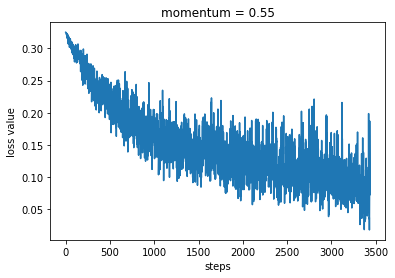

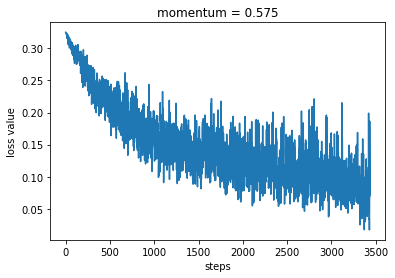

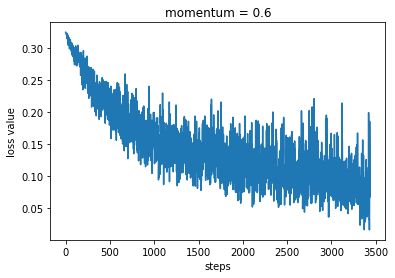

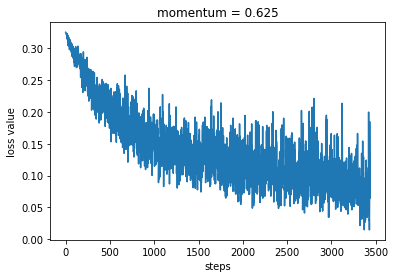

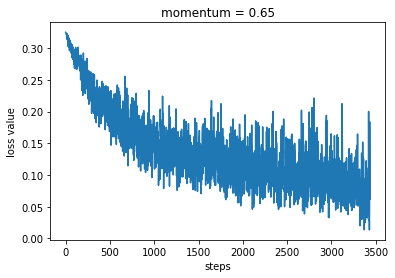

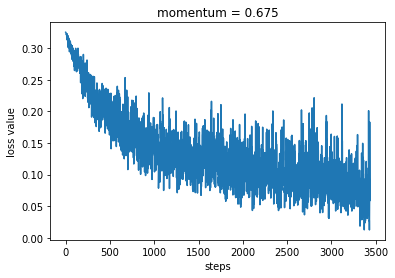

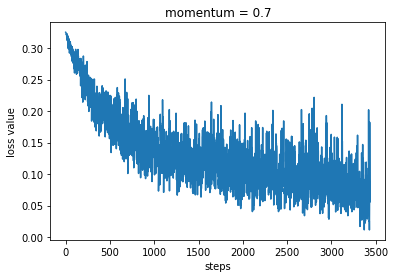

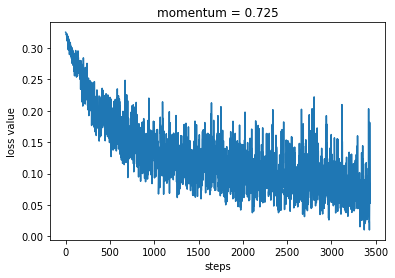

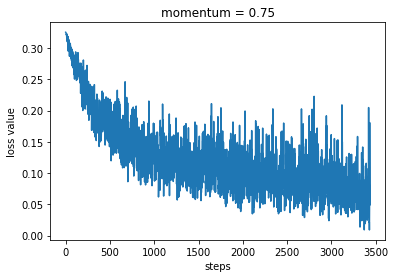

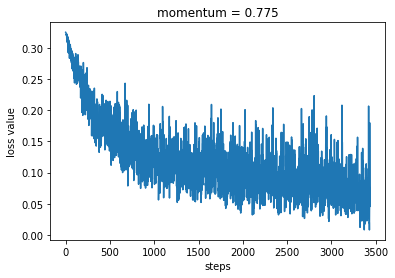

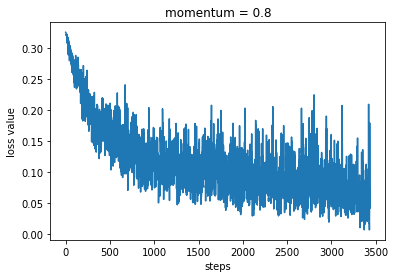

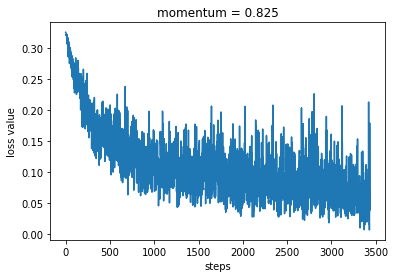

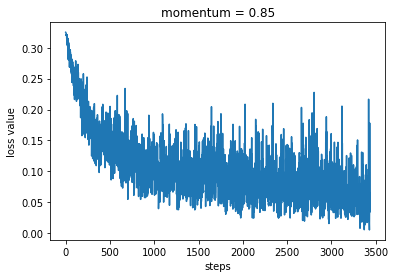

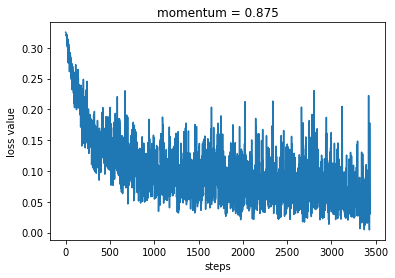

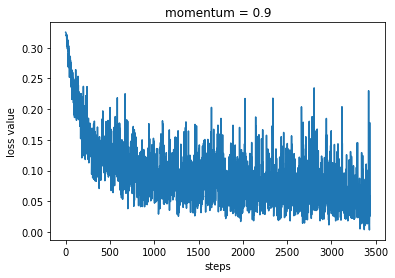

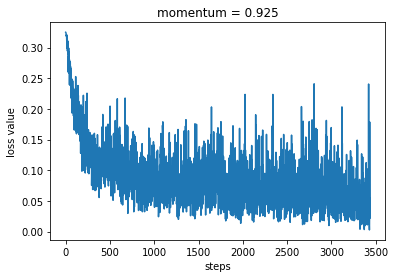

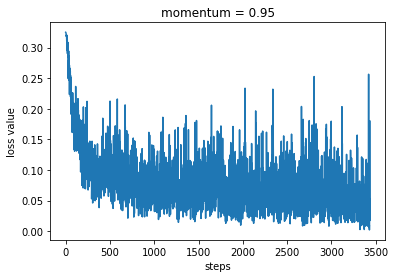

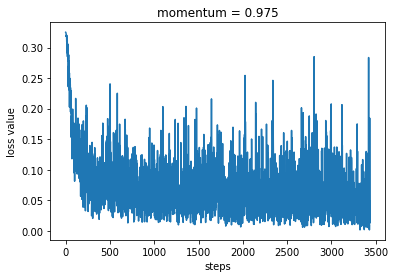

In [24]:
for m in range(22, 40): #здесь m = momentum * 40
    graph = train(X, y, tf.train.MomentumOptimizer(learning_rate = 0.01, momentum = m / 40).minimize(loss))
    plt.plot(range(len(graph)), graph)
    plt.title('momentum = {0}'.format(m / 40)) 
    plt.xlabel('steps')
    plt.ylabel('loss value')
    plt.show()

Ваш ответ: положим momentum = 0.625

**Задание 2.2** (0.5 баллa). Исследуйте вклад `learning_rate`. Для этого для разных значений `learning_rate` постройте графики значения функции потерь от номера итерации. При каких значениях длины шага градиентного спуска алгоритм сходится быстрее? Используйте параметр метод MomentumOptimizer с параметром, который вы считаете лучшим по итогам предыдущего задания.

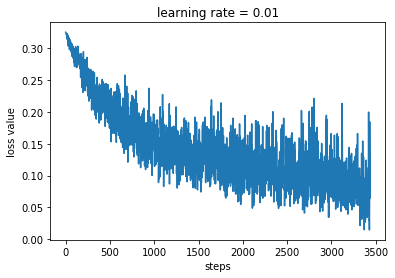

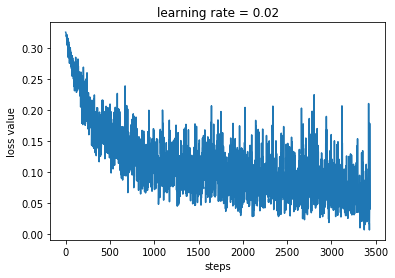

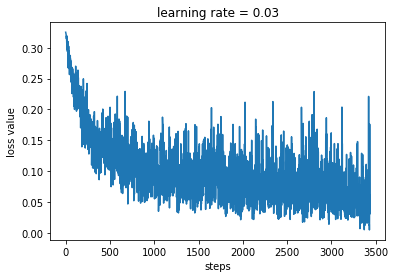

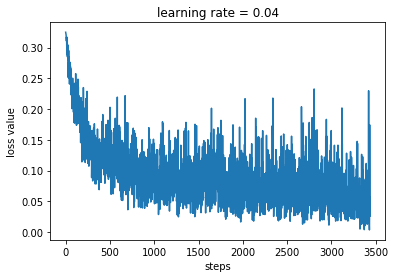

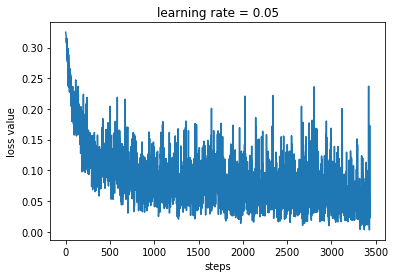

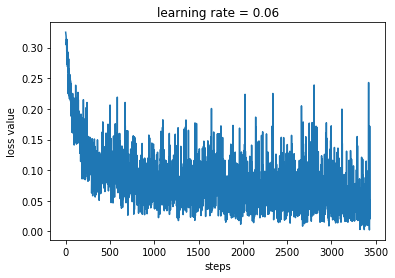

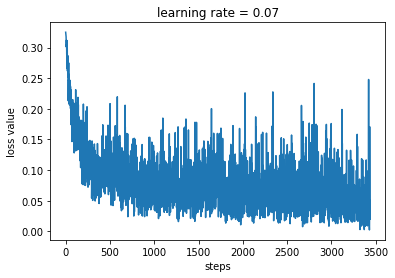

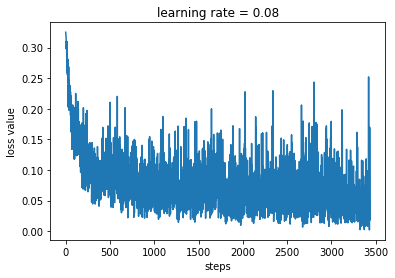

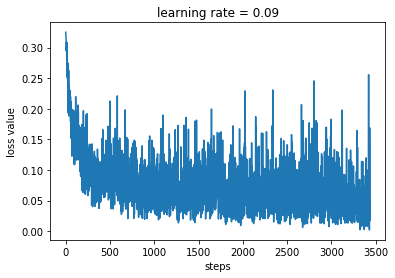

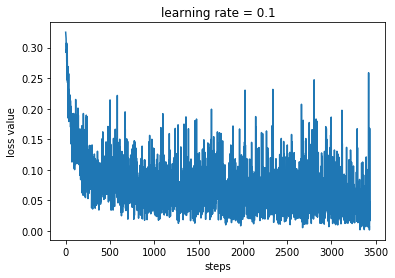

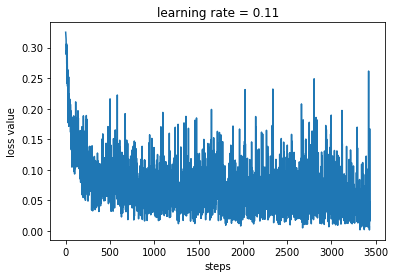

In [26]:
for alpha in range(1, 12): #здесь alpha = learning_rate * 100
    graph = train(X, y, tf.train.MomentumOptimizer(learning_rate = alpha / 100, momentum = 0.625).minimize(loss))
    plt.plot(range(len(graph)), graph)
    plt.title('learning rate = {0}'.format(alpha / 100)) 
    plt.xlabel('steps')
    plt.ylabel('loss value')
    plt.show()

Ваш ответ: 0.06 выглядит ok, так как большой learning rate даст нестабильный результат.

**Задание 2.3** (0.5 балла) Проделайте то же, что и в пункте выше, но используйте в качестве базового алгоритма оптимизации `Adam` с дефолтными параметрами.

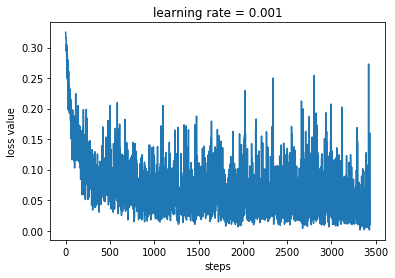

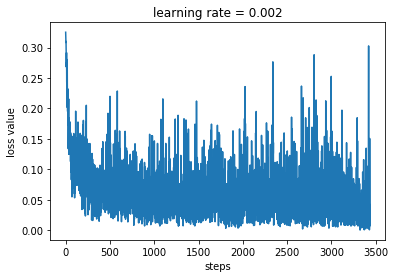

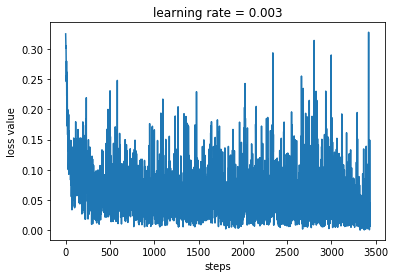

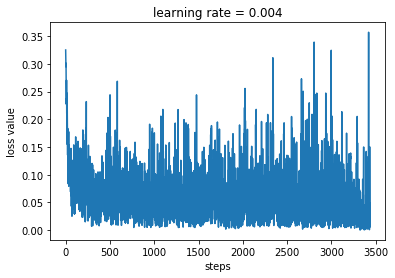

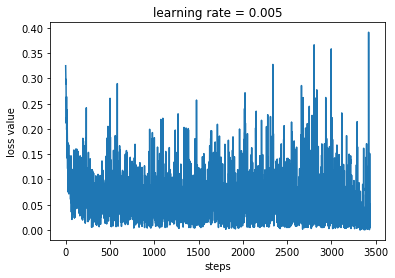

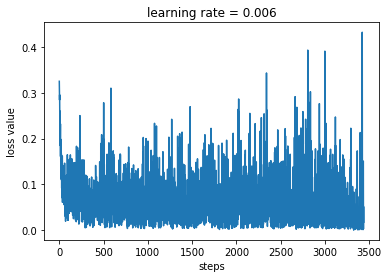

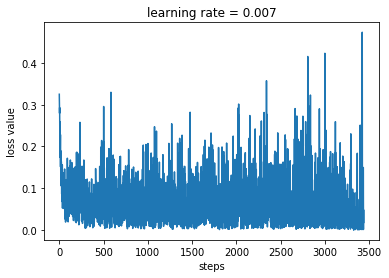

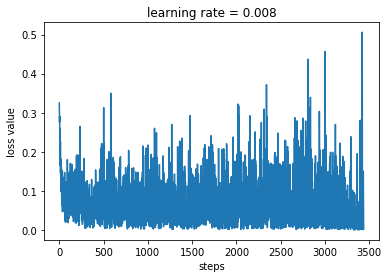

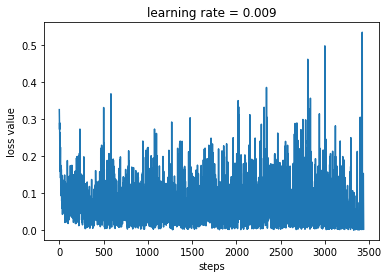

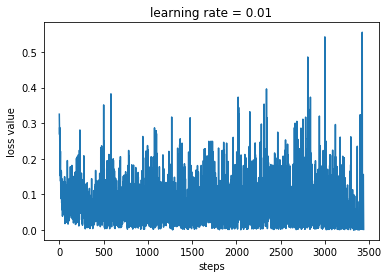

In [28]:
for alpha in range(1, 11): #здесь alpha = learning_rate * 1000, так как в Adam'е дефолтный learning_rate очень мал (0.001)
    graph = train(X, y, tf.train.AdamOptimizer(learning_rate = alpha / 1000).minimize(loss))
    plt.plot(range(len(graph)), graph)
    plt.title('learning rate = {0}'.format(alpha / 1000)) 
    plt.xlabel('steps')
    plt.ylabel('loss value')
    plt.show()

Ваш ответ: лучшим значением learning_rate для Adam оказалось 0.001

**Задание 2.4** (0.5 балла) Сравните алгоритмы `Adam` и `Momentum` для данной задачи. Какой показывает себя лучше?

Text(0, 0.5, 'loss')

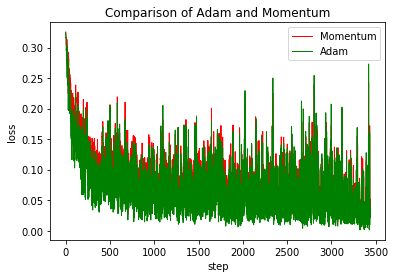

In [34]:
Momentum_best = train(X, y, tf.train.MomentumOptimizer(learning_rate = 0.06, momentum = 0.625).minimize(loss))
Adam_best = train(X, y, tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss))
plt.plot(range(len(Momentum_best)), Momentum_best, 'r', linewidth = 1)
plt.plot(range(len(Adam_best)), Adam_best, 'g', linewidth = 1)
plt.legend(['Momentum','Adam'], loc = 1)
plt.title('Comparison of Adam and Momentum')
plt.xlabel('step')
plt.ylabel('loss')


Ваш ответ: Adam оказывается немного лучше (красные линии видны только выше, но не ниже зелёных). При этом гиперпараметры Adam'а почти не настраивались.

## Задание 3 -- наша первая нейросеть, часть 2 (4 балла).

В этом задании мы напишем нейросеть для работы с датасетом MNIST размера 28х28. Исользовать можно только полносвязные (dense) слои! Для этого мы "вытянем" картинки 28х28 в длинный вектор размера 784.

In [35]:
import sys
import os
import time

import numpy as np

__doc__="""taken from https://github.com/Lasagne/Lasagne/blob/master/examples/mnist.py"""

def load_dataset():
    # We first define a download function, supporting both Python 2 and 3.
    if sys.version_info[0] == 2:
        from urllib import urlretrieve
    else:
        from urllib.request import urlretrieve

    def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
        print("Downloading %s" % filename)
        urlretrieve(source + filename, filename)

    # We then define functions for loading MNIST images and labels.
    # For convenience, they also download the requested files if needed.
    import gzip

    def load_mnist_images(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the inputs in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=16)
        # The inputs are vectors now, we reshape them to monochrome 2D images,
        # following the shape convention: (examples, channels, rows, columns)
        data = data.reshape(-1, 1, 28, 28)
        # The inputs come as bytes, we convert them to float32 in range [0,1].
        # (Actually to range [0, 255/256], for compatibility to the version
        # provided at http://deeplearning.net/data/mnist/mnist.pkl.gz.)
        return (data / np.float32(256)).squeeze()

    def load_mnist_labels(filename):
        if not os.path.exists(filename):
            download(filename)
        # Read the labels in Yann LeCun's binary format.
        with gzip.open(filename, 'rb') as f:
            data = np.frombuffer(f.read(), np.uint8, offset=8)
        # The labels are vectors of integers now, that's exactly what we want.
        return data

    # We can now download and read the training and test set images and labels.
    X_train = load_mnist_images('train-images-idx3-ubyte.gz')
    y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
    X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
    y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

    # We reserve the last 10000 training examples for validation.
    X_train, X_val = X_train[:-10000], X_train[-10000:]
    y_train, y_val = y_train[:-10000], y_train[-10000:]

    # We just return all the arrays in order, as expected in main().
    # (It doesn't matter how we do this as long as we can read them again.)
    return X_train, y_train, X_val, y_val, X_test, y_test


X_train, y_train, X_test, y_test, _, _ = load_dataset()

X_train = X_train.reshape(len(X_train), -1)
X_test = X_test.reshape(len(X_test), -1)

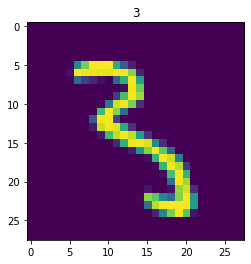

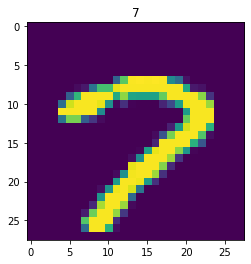

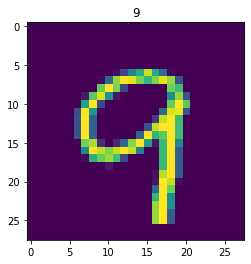

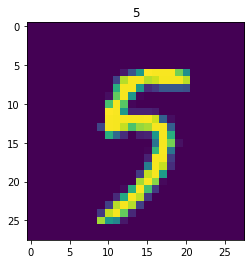

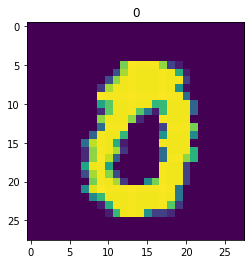

In [36]:
for i in [228, 1437, 322, 420, 69]:
    plt.title(y_train[i])
    plt.imshow(X_train[i].reshape((28, 28)))
    plt.show()

Подберите архитектуру и алгоритм оптимизации так, чтобы значение accuracy на тестовой выборке было не менее 97.5.

Test accuracy:  0.9746


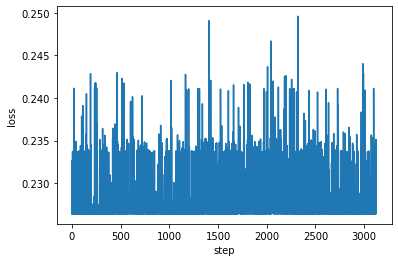

In [102]:

tf.reset_default_graph()

def train_and_validate(X_train, y_train, X_test, y_test, train_op, batch_size=16):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        n_batch_train = len(X_train) // batch_size
        n_batch_test = len(X_test) // batch_size
        for epoch in range(8): # сделаем epoch больше 1 для лучшего качества, при этом батч надо рандомизировать
            loss_history_train = []
            indices = np.arange(len(X_train)).astype(np.int32)
            np.random.shuffle(indices) # случайный шаффл индексов 
            for b in range(n_batch_train):
                _, loss_ = sess.run([train_op, loss], feed_dict={X_input: X_train[indices[b*batch_size:(b+1)*batch_size]],
                                                                 y_input: y_train[indices[b*batch_size:(b+1)*batch_size]]
                                                                 })
                loss_history_train.append(loss_)

        for epoch in range(1):
            loss_history_test = []
            prediction_history = []
            for b in range(n_batch_test):
                loss_, predicted_ = sess.run([loss, predicted], feed_dict={X_input: X_test[b*batch_size:(b+1)*batch_size],
                                                                 y_input: y_test[b*batch_size:(b+1)*batch_size]
                                                                 })
                loss_history_test.append(loss_)
                prediction_history += predicted_.argmax(-1).tolist()
            print("Test accuracy: ", sum([y_test[i] == prediction_history[i] for i in range(len(y_test))]) / len(y_test))
    return loss_history_train, loss_history_test #какие-то проблемы с sklearn, поэтому переписал просто score по обычному

X_input = tf.placeholder("float32", (None, 784)) # dim = [batch_size, 784]
y_input = tf.placeholder("int32", (None,)) # dim = [batch_size,]

layer1 = tf.layers.dense(X_input, 160, activation = tf.nn.relu) #<define architecture as a function of X_input>
layer2 = tf.layers.dense(layer1, 160, activation = tf.nn.relu)
layer3 = tf.layers.dense(layer2, 160, activation = tf.nn.relu)
layer4 = tf.layers.dense(layer3, 64, activation = tf.nn.sigmoid)
layer5 = tf.layers.dense(layer4, 10, activation = tf.nn.sigmoid) # настакаем 6 слоев полнослойной нейросети


predicted = tf.nn.softmax(layer5)

loss = tf.losses.log_loss(tf.one_hot(y_input, depth = 10), predicted) # лосс считаем через log_loss
train_op = tf.train.AdamOptimizer(learning_rate = 0.001).minimize(loss) #в качестве алогритма оптимизации возьмём Adam

loss_history_train, loss_history_test = train_and_validate(X_train, y_train, X_test, y_test, train_op)

plt.plot(range(len(loss_history_train)), loss_history_train)
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

Мы добились воспроизводимых результатов с Test accuracy > 0.97

## Задание 4 (0.1 баллов).

**Задание 4.1**. (0.1 баллов) Оставьте ниже смешную картинку (желательно про машинное обучение). Лучшую картинку мы поставим на аватарку чатика "Флуд про ИАД".

**Задание 4.2**. Напищите ниже фидбек по заданию и по курсу в целом. 

Семинары очень хорошие и полезные. Курс плотный. Задание очень интересное, но требует очень много самостоятельного продумывания - почти невозможно сразу понять что требуется написать в некоторых местах или хотя бы оценить объём кода. Очень хорошо, что многие технические моменты прописаны заранее, иначе бы уходило гораздо больше времени на не принципиальные моменты.